## Lendo o dataframe de microdados do ENEM
#### rode esta célula pra reinicar o dataframe

In [ ]:
import pandas as pd

# Caminho para o arquivo CSV (ajuste conforme a localização)
caminho_csv_dados_enem = "E:\\Users\\Tiago\\Feadev\\Capacitação\\Projetos\\ENEM\\microdados_enem_2023\\DADOS\\MICRODADOS_ENEM_2023.csv"

# Leitura do CSV
df_enem = pd.read_csv(caminho_csv_dados_enem, sep=';', encoding='latin1', low_memory=False)

# Exibe as primeiras linhas
print(df_enem.head())


## Tratamento de Dados

In [79]:
#Q1 = escolaridade pai, Q2 = mãe, Q5 tamanho da familia, Q6 renda familiar
colunas = [
            'Q001', 'Q002', 'Q005', 'Q006', 'TP_SEXO', 'TP_COR_RACA', 'TP_FAIXA_ETARIA',    #caracteristicas
            'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'       #notas
           ]


# Remove linhas onde Q001 ou Q002 sejam 'H' (responderam com nao sei escolaridade dos pais)
df_enem = df_enem[(df_enem['Q001'] != 'H') & (df_enem['Q002'] != 'H')]

map_escolaridade = {
    'A': 0,  # Nunca estudou
    'B': 1,  # Não completou a 4ª série/5º ano do Ensino Fundamental.
    'C': 2,  # Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
    'D': 3,  # Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
    'E': 4,  # Completou o Ensino Médio, mas não completou a Faculdade.
    'F': 5,  # Completou a Faculdade, mas não completou a Pós-graduação.
    'G': 6,  # Completou a Pós-graduação.
    'H': 0,  # Não sei.
}

df_enem['ESC_PAI'] = df_enem['Q001'].map(map_escolaridade)
df_enem['ESC_MAE'] = df_enem['Q002'].map(map_escolaridade)
df_enem['ESC_PAI_MAE'] = df_enem['ESC_PAI'] + df_enem['ESC_MAE']

# Mapeia renda familiar (Q006)
map_renda1 = {
    'A': 0,   
    'B': 660,   # até R$ 1320
    'C': 1650,
    'D': 2310,
    'E': 2970,
    'F': 3630,
    'G': 4620,
    'H': 5940,
    'I': 7260,
    'J': 8580,
    'K': 9900,
    'L': 11200,
    'M': 12540,
    'N': 14520,
    'O': 17820, 
    'P': 23100, 
    'Q': 26400,  
}

map_renda2 = {
    'A': 0,   
    'B': 1,   # até R$ 1320
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14, 
    'P': 15, 
    'Q': 16,  
}

df_enem['RENDA_CAPITA'] = df_enem['Q006'].map(map_renda1) / df_enem['Q005']

# Mapeia sexo
df_enem['SEXO'] = df_enem['TP_SEXO'].map({'F': 0, 'M': 1})

# Nota média das 5 provas
df_enem['NOTA_MEDIA'] = df_enem[[
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
    'NU_NOTA_MT', 'NU_NOTA_REDACAO'
]].mean(axis=1)

# Seleciona colunas numéricas finais
dados_numericos = df_enem[[
    'RENDA_CAPITA', 'ESC_PAI_MAE', 'SEXO', 'TP_COR_RACA', 'NOTA_MEDIA', 'TP_FAIXA_ETARIA'
]].dropna()

## Matriz de correlação entre fatores significativos
#### Escolaridade dos pais, renda per capita, cor, genero e idade

                 RENDA_CAPITA  ESC_PAI_MAE      SEXO  TP_COR_RACA  NOTA_MEDIA  \
RENDA_CAPITA         1.000000     0.454971  0.077298    -0.234458    0.368177   
ESC_PAI_MAE          0.454971     1.000000  0.071508    -0.231354    0.395855   
SEXO                 0.077298     0.071508  1.000000    -0.006444    0.025931   
TP_COR_RACA         -0.234458    -0.231354 -0.006444     1.000000   -0.223693   
NOTA_MEDIA           0.368177     0.395855  0.025931    -0.223693    1.000000   
TP_FAIXA_ETARIA     -0.101904    -0.363153  0.019690     0.110499   -0.111836   

                 TP_FAIXA_ETARIA  
RENDA_CAPITA           -0.101904  
ESC_PAI_MAE            -0.363153  
SEXO                    0.019690  
TP_COR_RACA             0.110499  
NOTA_MEDIA             -0.111836  
TP_FAIXA_ETARIA         1.000000  


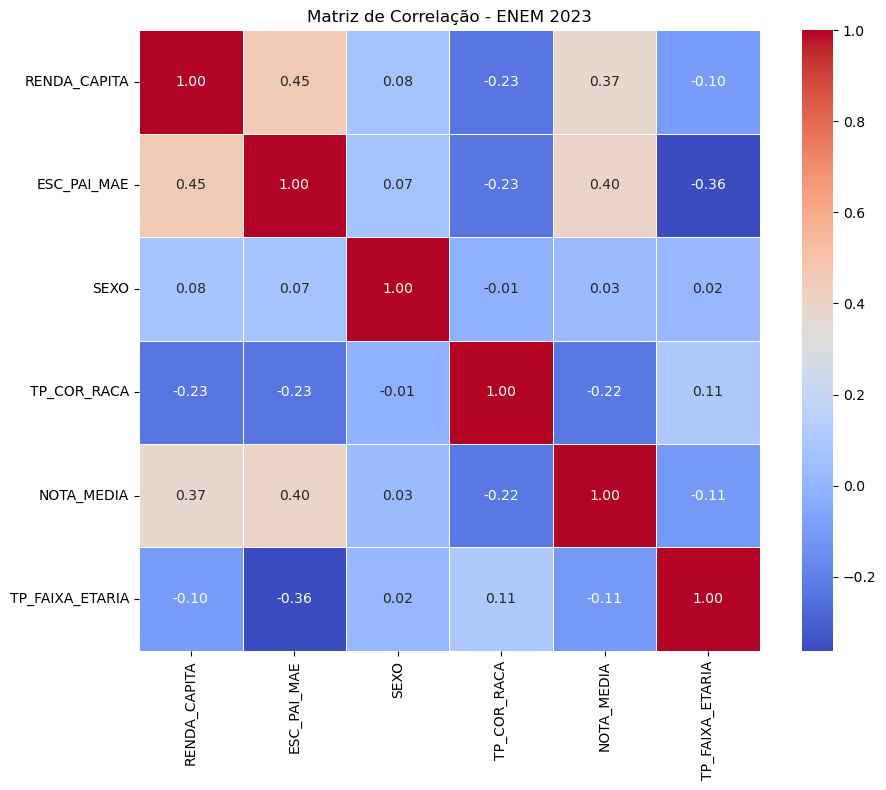

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Matriz de correlação
matriz_corr = dados_numericos.corr()

# Exibe
print(matriz_corr)

# Plota heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Matriz de Correlação - ENEM 2023")
plt.tight_layout()
plt.show()


## Analise da distribuição Geográfica das notas
#### Por Estado

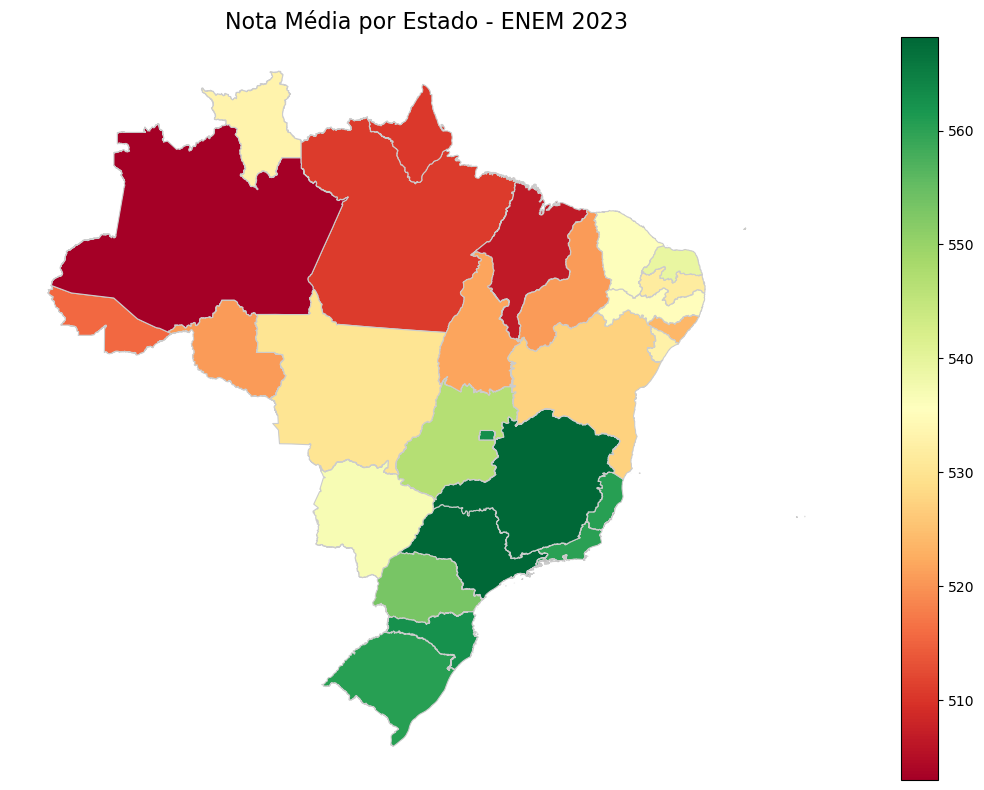

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

brasil = gpd.read_file("Dados/BR_UF_2024/BR_UF_2024.shp") ##shape file do IBGE: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html


# Remove candidatos com alguma nota faltando
df_validos = df_enem.dropna(subset=[
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
    'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'SG_UF_PROVA'
])

# Agrupa por estado (UF) e calcula média das notas
media_por_uf = df_validos.groupby('SG_UF_PROVA')['NOTA_MEDIA'].mean().reset_index()

# Carrega o shapefile dos estados brasileiros
brasil = gpd.read_file("Dados/BR_UF_2024/BR_UF_2024.shp")


# Junta os dados do ENEM com o mapa usando a sigla do estado
mapa_dados = brasil.merge(media_por_uf, left_on='SIGLA_UF', right_on='SG_UF_PROVA')

# Plota o mapa
fig, ax = plt.subplots(figsize=(12, 8))
mapa_dados.plot(column='NOTA_MEDIA', cmap='RdYlGn', linewidth=0.8, edgecolor='0.8',
                legend=True, ax=ax)

ax.set_title('Nota Média por Estado - ENEM 2023', fontsize=16)
ax.axis('off')
plt.tight_layout()

plt.savefig('plots/Mapas/Medias_por_UF.png', dpi=300) # Salva o plot na subpaste de plots

plt.show()



## Código de Clustering para agrupamento de candidatos

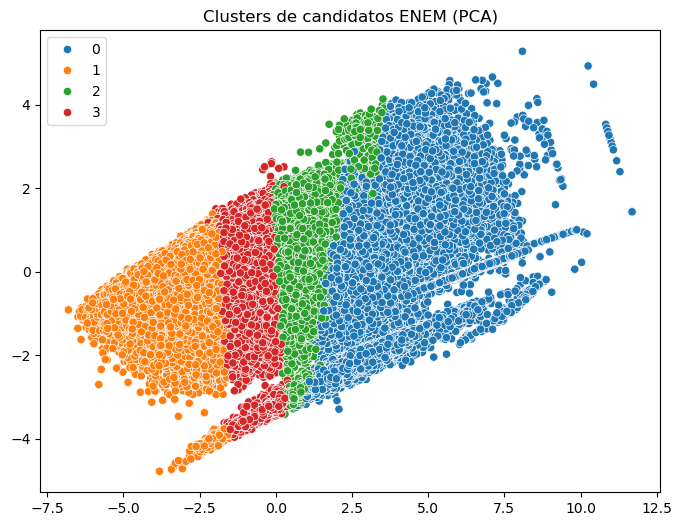

In [56]:


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Selecionar as colunas desejadas
colunas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Filtrar e limpar
df_cluster = df_enem.dropna(subset=colunas)[colunas]

# Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

# Rodar KMeans com k clusters (ex: 4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Adicionar rótulo no DataFrame original
df_enem.loc[df_cluster.index, 'cluster'] = clusters

df_enem.groupby('cluster')[colunas].mean()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='tab10')
plt.title('Clusters de candidatos ENEM (PCA)')
plt.show()

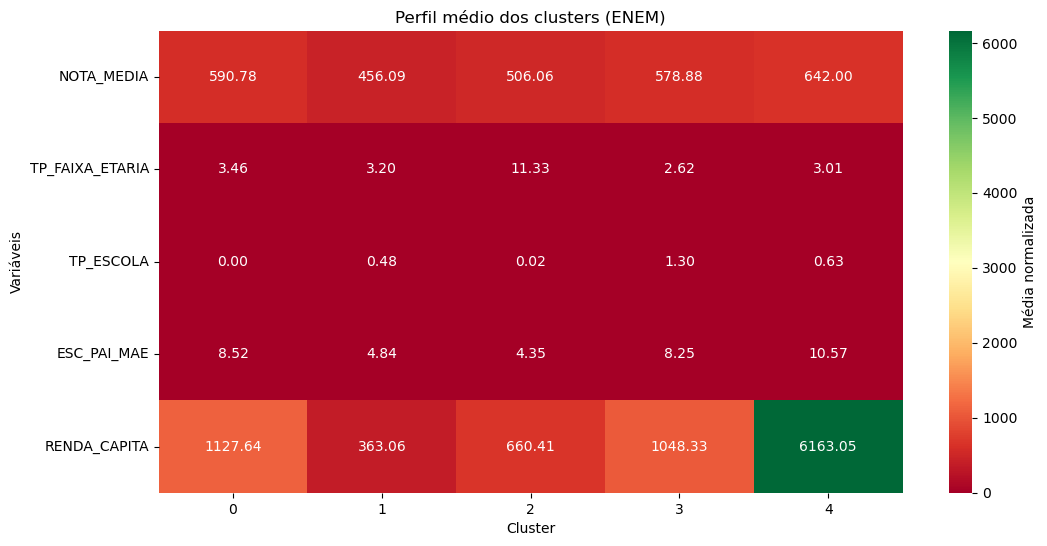

In [91]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Número de cluster/agrupamentos
quantidade_de_clusters = 5

# Define as colunas que usaremos no clustering
colunas_notas = ['NOTA_MEDIA']
colunas_extra = [
                    'TP_FAIXA_ETARIA', 'TP_ESCOLA', 'ESC_PAI_MAE', 'RENDA_CAPITA'
                 ]  

# Remove linhas com dados faltantes nas colunas que vamos usar
df_cluster = df_enem.dropna(subset=colunas_notas + colunas_extra).copy()

# Converte as variáveis categóricas para números
df_cluster['TP_SEXO'] = LabelEncoder().fit_transform(df_cluster['TP_SEXO'])
df_cluster['TP_ESCOLA'] = LabelEncoder().fit_transform(df_cluster['TP_ESCOLA'])



# Seleciona só as colunas para o clustering
X = df_cluster[colunas_notas + colunas_extra]

# Normaliza as variáveis para terem média 0 e desvio padrão 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Roda KMeans, definindo k (número de grupos) - você pode testar outros valores
k = quantidade_de_clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adiciona o resultado ao dataframe original
df_cluster['cluster'] = clusters

# Agora vamos visualizar os clusters com um gráfico das médias das variáveis por grupo
media_clusters = df_cluster.groupby('cluster')[colunas_notas + colunas_extra].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(media_clusters.T, annot=True, cmap='RdYlGn', cbar_kws={'label': 'Média normalizada'}, fmt=".2f")
plt.title('Perfil médio dos clusters (ENEM)')
plt.ylabel('Variáveis')
plt.xlabel('Cluster')
plt.show()

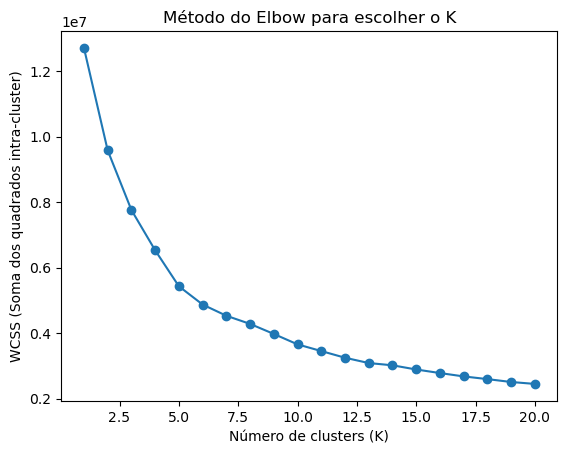

In [90]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_max = 20

for k in range(1, K_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ é a soma dos quadrados dentro dos clusters

plt.plot(range(1, K_max + 1), wcss, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WCSS (Soma dos quadrados intra-cluster)')
plt.title('Método do Elbow para escolher o K')
plt.show()